In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from plotnine import *

In [515]:
#读取数据，数据预处理
'''
Direction进出口方向（reimport表示复进口），Year年份，Date时间，Weekday星期，Current_Match对应的2020年时间
Country国家，Commodity商品类别，Transport_Mode运输方式，Measure交易单位，Value交易值，Cumulative累计交易值
'''
data=pd.read_csv('Effects.csv')
data=pd.DataFrame(data)
print(data.head())
data.shape
#print(data.columns)
data.dtypes
data=data.dropna()#缺失值处理，经验证，该数据集不存在缺失值，直接用吧
direction_cout=data.value_counts(['Direction'],sort=True, ascending=False)#统计种类数目
country_cout=data.value_counts(['Country'],sort=True, ascending=False)
commodity_cout=data.value_counts(['Commodity'],sort=True, ascending=False)
measure_cout=data.value_counts(['Measure'],sort=True, ascending=False)
trans_cout=data.value_counts(['Transport_Mode'],sort=True, ascending=False)
count_list=[direction_cout,country_cout,commodity_cout,measure_cout,trans_cout]
for i in count_list:
    print('-------------------------------------')
    print(i)
#由上述打印可知，计量单位不同-美元和吨，按照计量单位重新划分数据集
data['Date']=[datetime.strptime(d, '%d/%m/%Y').date() for d in data['Date']]#格式化字符串，转化为时间形式
data['Current_Match']=[datetime.strptime(d, '%d/%m/%Y').date() for d in data['Current_Match']]
data_s=data.loc[data['Measure'] == '$']
data_t=data.loc[data['Measure'] == 'Tonnes']
#print(data_s)
print(data.groupby(['Year','Country']).size())

  Direction  Year        Date    Weekday Current_Match Country Commodity  \
0   Exports  2015  31/01/2015   Saturday     1/02/2020     All       All   
1   Exports  2015   1/02/2015     Sunday     2/02/2020     All       All   
2   Exports  2015   2/02/2015     Monday     3/02/2020     All       All   
3   Exports  2015   3/02/2015    Tuesday     4/02/2020     All       All   
4   Exports  2015   4/02/2015  Wednesday     5/02/2020     All       All   

  Transport_Mode Measure      Value  Cumulative  
0            All       $  257000000   257000000  
1            All       $  123000000   380000000  
2            All       $  176000000   556000000  
3            All       $  115000000   671000000  
4            All       $   74000000   746000000  
-------------------------------------
Direction
Exports      32288
Imports       9720
Reimports     1080
dtype: int64
-------------------------------------
Country                    
All                            19440
China                 

In [518]:
#df_clear = data.drop(data[data['Value']<1000].index)
#df_clear = df_clear.drop(df_clear[df_clear['Value']>100000000].index)
des=data.iloc[:,[1,9]]
des=des.groupby(['Year'])
print(des.describe())
print(data['Value'].describe())

print(df_clear.shape)

       Value                                                          \
       count          mean           std  min        25%         50%   
Year                                                                   
2015  7193.0  2.814523e+07  4.802410e+07  0.0  1000000.0   8000000.0   
2016  7179.0  2.808367e+07  4.764532e+07  0.0  1000000.0   9000000.0   
2017  7185.0  3.021486e+07  5.051992e+07  0.0  1000000.0  10000000.0   
2018  7188.0  3.306260e+07  5.647430e+07  0.0  1000000.0  10000000.0   
2019  7185.0  3.444509e+07  5.731299e+07  0.0  1000000.0  11000000.0   
2020  7158.0  3.300373e+07  5.542732e+07  0.0  1000000.0  10000000.0   

                               
             75%          max  
Year                           
2015  29000000.0  393000000.0  
2016  29000000.0  399000000.0  
2017  32000000.0  336000000.0  
2018  34000000.0  399000000.0  
2019  36000000.0  396000000.0  
2020  35000000.0  550000000.0  
count    4.308800e+04
mean     3.115804e+07
std      5.277194e+

In [107]:
#时间序列数据可视化 tones
#折线图
#data_tc=data_t.loc[data_t['Country']=='China']
 #and data_t['Commodity'] == 'Meat'
p=(
    #ggplot(data_t.loc[data_t['Year'] == 2020], aes(x ='Date', y = 'Value',group='Commodity',color='Commodity') )+
    #ggplot(data_t.loc[data_t['Commodity'] == 'Forestry'], aes(x ='Date', y = 'Value', group='Country',color='Country') )+
    ggplot(data_tc.loc[data_tc['Commodity'] == 'Meat'], aes(x ='Date', y = 'Value',group='Commodity',color='Commodity') )+
    geom_line(size=0.5)+
    #scale_x_date(date_labels = "%B",date_breaks = "1 month")+
    scale_x_date(date_labels = "%Y",date_breaks = "1 year")+
    #scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    xlab("Year")+ 
    #xlab("Month")+
    ylab("Value")
    +ggtitle('Meat export of China')
)
#forestry 木头

p.save(filename = 'Meat export of China', dpi=1000)
#print(data_tc.loc[data_tc['Commodity'] == 'Dairy'])

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Meat export of China


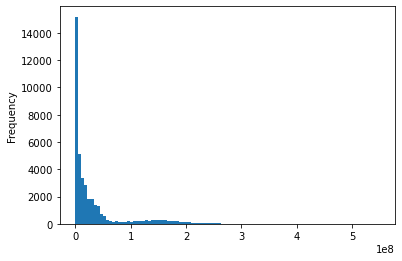

In [501]:
s = df_clear['Value']
ax = s.plot.hist(bins=100)

In [523]:
df=data.iloc[:,[0,5,6]]
print(df.groupby(['Direction','Country','Commodity']).size())
df2=data.loc[:,['Year','Transport_Mode','Value']]
print(df2.groupby(['Year','Transport_Mode']).mean())
print(5/6)

Direction  Country                      Commodity                  
Exports    All                          All                            3240
                                        Dairy                          2160
                                        Forestry                       2160
                                        Fruit                          1080
                                        Meat                           2160
                                        Non-food manufactured goods    1080
                                        Seafood                        1080
           Australia                    All                            1080
           China                        All                            1080
                                        Dairy                          2149
                                        Forestry                       2144
                                        Meat                           2156
                    

In [122]:
#时间序列数据可视化 tones
#折线图
#data_tc=data_t.loc[data_t['Country']=='China']
 #and data_t['Commodity'] == 'Meat'
p=(
    ggplot(data_s.loc[data_s['Year'] == 2020], aes(x ='Date', y = 'Cumulative',group='Direction',color='Direction') )+
    #ggplot(data_t.loc[data_t['Commodity'] == 'Forestry'], aes(x ='Date', y = 'Value', group='Country',color='Country') )+
    #ggplot(data_tc.loc[data_tc['Commodity'] == 'Meat'], aes(x ='Date', y = 'Value',group='Commodity',color='Commodity') )+
    geom_line(size=0.5)+
    scale_x_date(date_labels = "%B",date_breaks = "1 month")+
    #scale_x_date(date_labels = "%Y",date_breaks = "1 year")+
    scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    #xlab("Year")+ 
    xlab("Month")+
    ylab("Value")
    +ggtitle('2020 Cumulative for different direction')
)
#forestry 木头

p.save(filename = '2020 Cumulative for different direction', dpi=1000)
#print(data_tc.loc[data_tc['Commodity'] == 'Dairy'])

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 2020 Cumulative for different direction
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


                Value
Date                 
2015-01-31  257000000
2015-02-01  123000000
2015-02-02  176000000
2015-02-03  115000000
2015-02-04   74000000
...               ...
2020-07-25          0
2020-07-26          0
2020-07-27          0
2020-07-28    1000000
2020-07-29          0

[34493 rows x 1 columns]


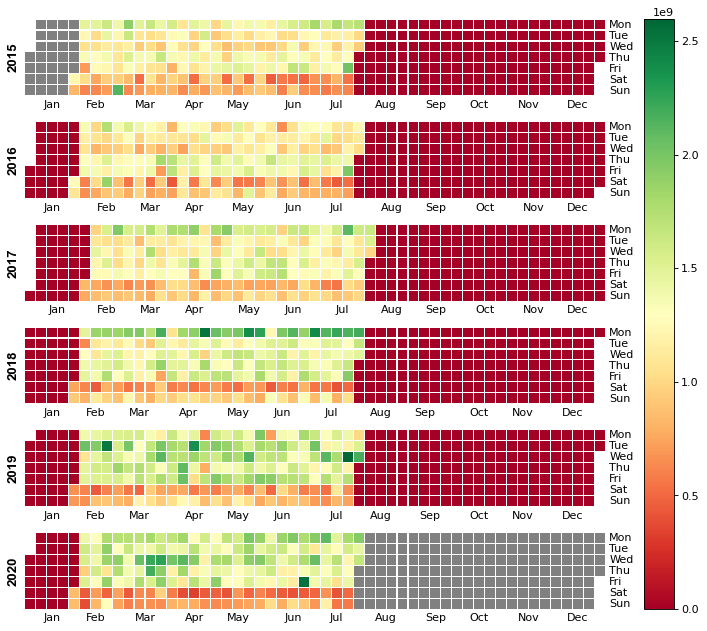

In [140]:
import calmap
df=data_s.iloc[:,[2,9]]
df=df.astype({'Date': 'datetime64[ns]'})
df.set_index('Date', inplace=True)#将索引设置为日期索引
print(df)
fig,ax = calmap.calendarplot(df['Value'],  fillcolor='grey', 
                           linecolor='w',linewidth=0.1,cmap='RdYlGn',
                           yearlabel_kws={'color':'black', 'fontsize':12},
                           fig_kws=dict(figsize=(10,8),dpi= 80))
#添加colorbar
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

Year  Transport_Mode
2015  Air                360
      All               6473
      Sea                360
2016  Air                360
      All               6459
      Sea                360
2017  Air                360
      All               6465
      Sea                360
2018  Air                360
      All               6468
      Sea                360
2019  Air                360
      All               6465
      Sea                360
2020  Air                360
      All               6438
      Sea                360
dtype: int64
Commodity                    Transport_Mode
All                          Air                2160
                             All               15120
                             Sea                2160
Dairy                        All                5389
Forestry                     All                4304
Fruit                        All                1080
Machinery and electronics    All                2160
Meat                         

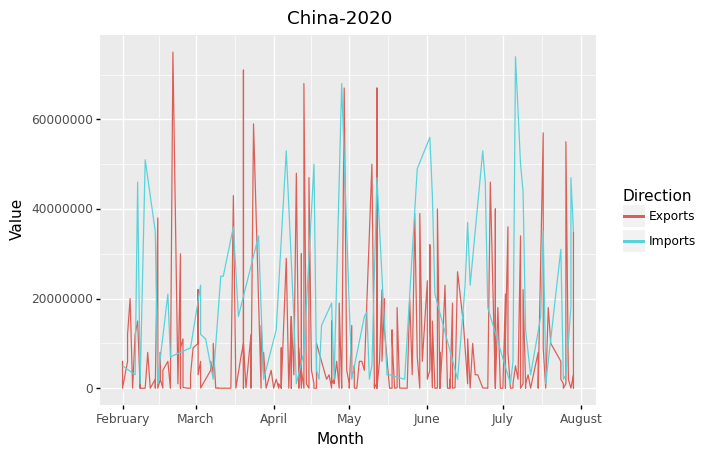

<ggplot: (8782822586781)>

In [156]:
#分组查看数据
group_trans_year=data.groupby(['Year', 'Transport_Mode'])
df_trans_year = group_trans_year.size()
print(df_trans_year)#基本没有什么变化，不做分析-即疫情对交通方式的占比没有太大影响

group_trans_com=data.groupby(['Commodity', 'Transport_Mode'])
df_trans_com = group_trans_com.size()
print(df_trans_com)#没有什么意义

df_China=data.loc[data['Country']=='China']
df_China=df_China.sample(frac=0.2, replace=True, random_state=1)#采样
#print(df_China)

(
    #ggplot(data.loc[data[''] == 2020], aes(x ='Date', y = 'Value',group='Commodity',color='Commodity') )+
    #ggplot(data_t.loc[data_t['Commodity'] == 'Forestry'], aes(x ='Date', y = 'Value', group='Country',color='Country') )+
    ggplot(df_China.loc[df_China['Year'] == 2020], aes(x ='Date', y = 'Value',group='Direction',color='Direction') )+
    geom_line(size=0.5)+
    scale_x_date(date_labels = "%B",date_breaks = "1 month")+
    #scale_x_date(date_labels = "%Y",date_breaks = "1 year")+
    #scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    #xlab("Year")+ 
    xlab("Month")+
    ylab("Value")
    +ggtitle('China-2020')
)



In [189]:
#计算时间序列的平稳性
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

df_times=data.astype({'Date': 'datetime64[ns]'})
df_times.set_index('Date', inplace=True)#将索引设置为日期索引
#df_times=df_times.loc[df_times['Year']==2015]
'''
dfs_times=df_times.loc[df_times['Measure'] == '$']
dft_times=df_times.loc[df_times['Measure'] == 'Tonnes']
dfs_times=dfs_times.iloc[:,[8]]
dft_times=dft_times.iloc[:,[8]]
'''
#df_times=df_times.iloc[:,[8]]

'''
print(df_times)
print(dfs_times)
print(dft_times)
'''

# 导入原始数据
d=[2015,2016,2017,2018,2019,2020]
pvalue=[]
for i in d:
    df_timess=df_times.loc[df_times['Year']==i]
    series = df_timess.loc[:, 'Value'].values
#df_times.plot(figsize=(14,8), legend=None, title='Trade Value Series')
# 使用ADF Test
    result = adfuller(series, autolag='AIC')
    pvalue.append(result[1])
#print(f'ADF Statistic: {result[0]}')
#print(f'p-value: {result[1]}')
print(pvalue)
'''
整体：时间序列是平稳的，p<0.05
ADF Statistic: -4.53815384017111
n_lags: 0.00016767366525350386
p-value: 0.00016767366525350386
按照年份划分，所有p值<0.05,故，认为时间序列是平稳的
p=[1.4058094538274125e-06, 6.630165966363343e-06, 0.0003871314218906348, 4.364842164377151e-05, 0.00011255424620607935, 2.150383182168894e-05]
'''

[1.4058094538274125e-06, 6.630165966363343e-06, 0.0003871314218906348, 4.364842164377151e-05, 0.00011255424620607935, 2.150383182168894e-05]


'\n整体：时间序列是平稳的，p<0.05\nADF Statistic: -4.53815384017111\nn_lags: 0.00016767366525350386\np-value: 0.00016767366525350386\n'

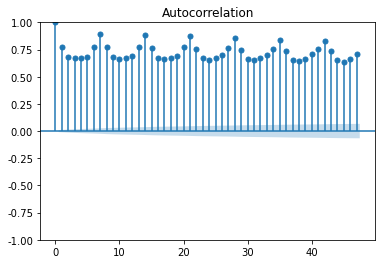

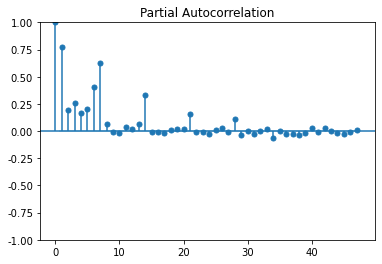

In [203]:
#计算时间序列的自相关性
# 画出acf函数
# 蓝色底色区域内画出的是95%置信区间，数据落在蓝色区域内表示在统计学意义上在x轴的时间间隔下具有自相关性
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
series=df_times.loc[:, 'Value'].values
plot_acf(series)
plot_pacf(series)
plt.show()
#自相关性较为明显蓝色区域为误差范围(Error Band)，区域内的数据被认为是不显著的。由图可见，该时间序列的自相关性较强
#平稳时间序列具有较强的自相关性

In [461]:
#MA模型

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
df0=pd.read_csv('Effects.csv')
# 导入销售数据，绘制原始图像
#重采样，数据有些可怕
#得到每一个月的第一个交易日：思路-遍历寻找，判断月份是否一致，返回不一致的第一个
#print(apple.iloc[0,0])
col=df0.columns
df0=df0.astype({'Date': 'string'})#将时间更改成字符串形式
#print(df0.dtypes)
number=1#number返回交易月数目
df1=pd.DataFrame(columns=col)#创建空数据框
i=1
while i<len(df0):
    temp=df0.iloc[i,2]
    if temp[0:2]=='1/':
        df1=df1.append(df0.iloc[i])
    else:
        for j in range(11):
            k=i+j+1
            if k>=len(df0)-1:
                break
            else:
                temp=df0.iloc[k,2]
                if temp[0:2]=='1/':
                    df1=df1.append(df0.iloc[k])
                    i=k
                    break
    number+=1
    i+=20
print(df1)
df1['Date']=[datetime.strptime(d, '%d/%m/%Y').date() for d in df1['Date']]
p=(
    #ggplot(data_t.loc[data_t['Year'] == 2020], aes(x ='Date', y = 'Value',group='Commodity',color='Commodity') )+
    #ggplot(data_t.loc[data_t['Commodity'] == 'Forestry'], aes(x ='Date', y = 'Value', group='Country',color='Country') )+
    ggplot(df1, aes(x ='Date', y = 'Value',group='Direction',color='Direction') )+
    geom_line(size=0.5)+
    #scale_x_date(date_labels = "%B",date_breaks = "1 month")+
    scale_x_date(date_labels = "%Y",date_breaks = "1 year")+
    #scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    xlab("Year")+ 
    #xlab("Month")+
    ylab("Value")
    +ggtitle('Value for direction and year')
)
#forestry 木头

p.save(filename = 'Value for direction and year', dpi=1000)
#print(data_tc.loc[data_tc['Commodity'] == 'Dairy'])

       Direction  Year       Date    Weekday Current_Match Country Commodity  \
1        Exports  2015  1/02/2015     Sunday     2/02/2020     All       All   
29       Exports  2015  1/03/2015     Sunday     1/03/2020     All       All   
60       Exports  2015  1/04/2015  Wednesday     1/04/2020     All       All   
90       Exports  2015  1/05/2015     Friday     1/05/2020     All       All   
121      Exports  2015  1/06/2015     Monday     1/06/2020     All       All   
...          ...   ...        ...        ...           ...     ...       ...   
42937  Reimports  2020  1/03/2020     Sunday     1/03/2020     All       All   
42968  Reimports  2020  1/04/2020  Wednesday     1/04/2020     All       All   
42998  Reimports  2020  1/05/2020     Friday     1/05/2020     All       All   
43029  Reimports  2020  1/06/2020     Monday     1/06/2020     All       All   
43059  Reimports  2020  1/07/2020  Wednesday     1/07/2020     All       All   

      Transport_Mode Measure      Value

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Value for direction and year


In [482]:
p=(
    #ggplot(data_t.loc[data_t['Year'] == 2020], aes(x ='Date', y = 'Value',group='Commodity',color='Commodity') )+
    #ggplot(data_t.loc[data_t['Commodity'] == 'Forestry'], aes(x ='Date', y = 'Value', group='Country',color='Country') )+
    ggplot(df1.loc[data['Year'] == 2020], aes(x ='Date', y = 'Value',group='Transport_Mode',color='Transport_Mode') )+
    geom_line(size=0.5)+
    scale_x_date(date_labels = "%B",date_breaks = "1 month")+
    #scale_x_date(date_labels = "%Y",date_breaks = "1 year")+
    #scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    #xlab("Year")+ 
    xlab("Month")+
    ylab("Value")
    +ggtitle('2020-transport-value')
)
#forestry 木头

p.save(filename = 'fuben 2020_transport', dpi=1000)
#print(data_tc.loc[data_tc['Commodity'] == 'Dairy'])

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: fuben 2020_transport


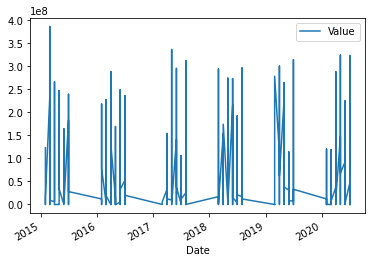

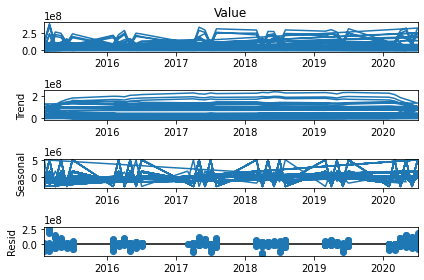

In [460]:
df1['Date']=[datetime.strptime(d, '%d/%m/%Y').date() for d in df1['Date']]#格式化字符串，转化为时间形式
df1['Date']=pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
df1=df1.iloc[:,[8]]
df1.plot()
#print(df0)
decomposed = seasonal_decompose(df1['Value'], period=10,model='additive')
x = decomposed.plot()
#一滩烂泥

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:597: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
/Users/MC/opt/anaconda3/lib/python3.8/site

<AxesSubplot:>

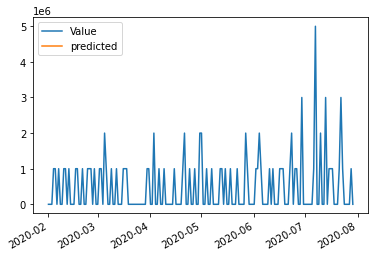

In [445]:

# 划分训练集合测试集
df0['Date']=[datetime.strptime(d, '%d/%m/%Y').date() for d in df0['Date']]#格式化字符串，转化为时间形式
df0['Date']=pd.to_datetime(df0['Date'])
df0.set_index('Date', inplace=True)
#df1=df1.iloc[:,[8]]
X = df0['Value']
train_data = X[1:len(X)-180]
test_data = X[len(X)-180:]  #以最后十二个点作为待预测值

# 训练AR模型
model = AutoReg(train_data,lags=7,missing='drop',trend='t',seasonal=True,period=10) 
model_fitted = model.fit()
# 预测测试集
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=True)  # dynamic参数表示是否用预测值动态预测下一个时刻的值

# 比较真实值和预测值
compare_df = pd.concat(
    [df0['Value'].tail(180),
    predictions], axis=1).rename(
    columns={'value': 'actual', 0:'predicted'})
compare_df.plot()

    Direction  Year         Value
0     Exports  2015  3.016279e+07
1     Exports  2016  3.014080e+07
2     Exports  2017  3.241574e+07
3     Exports  2018  3.497824e+07
4     Exports  2019  3.688433e+07
5     Exports  2020  3.686775e+07
6     Imports  2015  5.123580e+07
7     Imports  2016  5.090617e+07
8     Imports  2017  5.487160e+07
9     Imports  2018  6.127716e+07
10    Imports  2019  6.274691e+07
11    Imports  2020  5.627716e+07
12  Reimports  2015  5.777778e+05
13  Reimports  2016  5.500000e+05
14  Reimports  2017  4.111111e+05
15  Reimports  2018  5.111111e+05
16  Reimports  2019  4.500000e+05
17  Reimports  2020  4.833333e+05
[-0.07292282695345201, 7.547723004554311, 7.905127554020177, 5.449355000875442, -0.04495485910585895]
[-0.643357991373711, 7.789688121453171, 11.67371641992531, 2.3985332782640993, -10.310870634530241]
[-4.807692307692303, -25.252525252525253, 24.324324324324323, -11.956521739130435, 7.407407407407403]


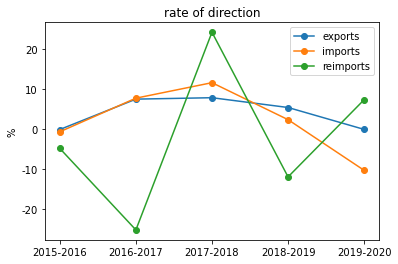

In [440]:
#条形图分组统计，横坐标年份，纵坐标，年平均总额，条形分类-进/出口，重出口-2
df2=data_s.iloc[:,[0,1,9]]
#print(df2)
df2_group=df2.groupby(['Direction','Year']).mean()
df2_group=df2_group.reset_index()
print(df2_group)
(
    ggplot(df2_group, aes(x='Year', y='Value', fill='Direction'))
    + geom_bar(stat='identity', color='black', position='dodge', width=0.7, size=0.75) #dodge表示并排表示
    + scale_fill_manual(values=['#E7B800','#00AFBB','#F5F5DC'])
    +ggtitle('average value for direction')
)
l_ex=[]
l_im=[]
l_re=[]
for i in range(5):
    temp1=(df2_group.iloc[i+1,2]-df2_group.iloc[i,2])*100/df2_group.iloc[i,2]
    temp2=(df2_group.iloc[i+7,2]-df2_group.iloc[i+6,2])*100/df2_group.iloc[i+6,2]
    temp3=(df2_group.iloc[i+13,2]-df2_group.iloc[i+12,2])*100/df2_group.iloc[i+12,2]
    l_ex.append(temp1)
    l_im.append(temp2)
    l_re.append(temp3)
x=['2015-2016','2016-2017','2017-2018','2018-2019','2019-2020']
print(l_ex)
print(l_im)
print(l_re)
plt.plot(x,l_ex,marker='o',label='exports')
plt.plot(x,l_im,marker='o',label='imports')
plt.plot(x,l_re,marker='o',label='reimports')
plt.ylabel('%')
plt.title('rate of direction')
plt.legend()

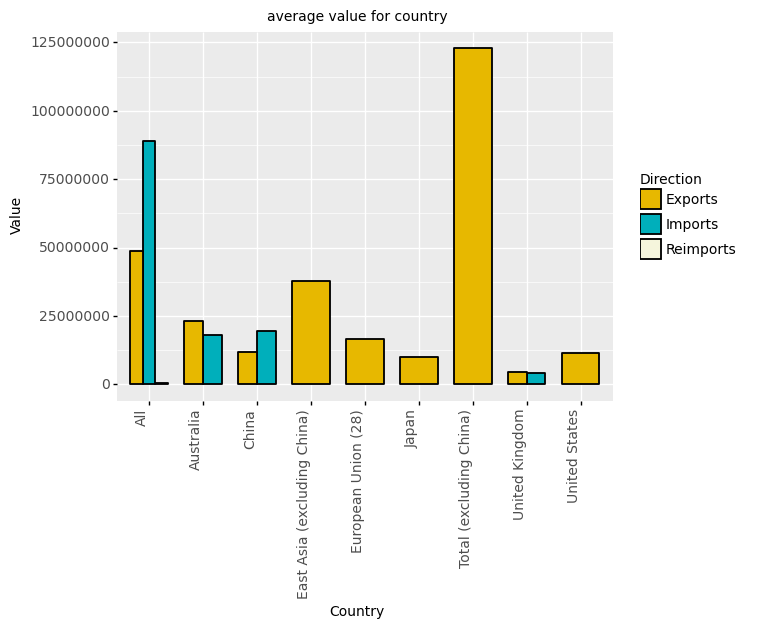

<ggplot: (8782824057841)>

In [423]:
#条形图分组统计，横坐标年份，纵坐标，年平均总额，条形分类-进/出口，重出口-2
df2=data_s.iloc[:,[0,5,9]]
#print(df2)
df2_group=df2.groupby(['Direction','Country']).mean()
df2_group=df2_group.reset_index()
df2_group
(
    ggplot(df2_group, aes(x='Country', y='Value', fill='Direction'))
    + geom_bar(stat='identity', color='black', position='dodge', width=0.7, size=0.75) #dodge表示并排表示
    + scale_fill_manual(values=['#E7B800','#00AFBB','#F5F5DC'])
    +ggtitle('average value for country')
    + theme(text = element_text(size=10),axis_text_x = element_text(angle=90, hjust=1))
)

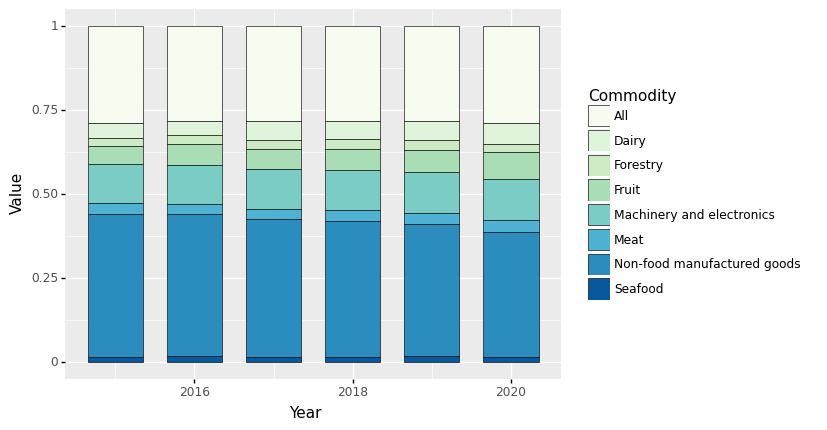

<ggplot: (8783015584299)>

In [356]:
#扇形图（或者其他可以表示占比的图），各类商品的年进出口总额占比-2
df3=data.iloc[:,[1,6,9]]
df3_group=df3.groupby(['Year','Commodity']).mean()
#print(df3_group)
df3_group=df3_group.reset_index()
#print(df3_group)

(
    ggplot(df3_group, aes(x='Year', y='Value', fill='Commodity'))
    + geom_bar(stat='identity', color='k', position='fill', width=0.7, size=0.25)
    + scale_fill_brewer(palette='GnBu')
)


   year                    commodity  value
0  2015                          All   3240
1  2015                        Dairy    900
2  2015                     Forestry    720
3  2015                        Fruit    180
4  2015    Machinery and electronics    360
5  2015                         Meat   1074
6  2015  Non-food manufactured goods    360
7  2015                      Seafood    359


<ipython-input-449-9d6ad447b7b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


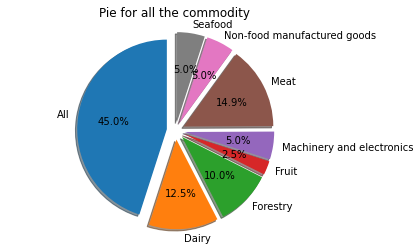

In [449]:
#基本上各品类所占比例是相同的
dff=df3_size.iloc[:8]
print(dff)
Sum_df = dff.loc[:,'value'].sum()
dff['percent'] = dff.loc[:,'value'].apply(lambda x: x/Sum_df)
#mydata = pd.melt(df, id_vars='Clarity')
#mydata
dff
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dff['commodity']
sizes = dff['percent']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie for all the commodity')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcf1967c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf1967c9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcf1967caf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf1924e850>],
 'fliers': [],
 'means': []}

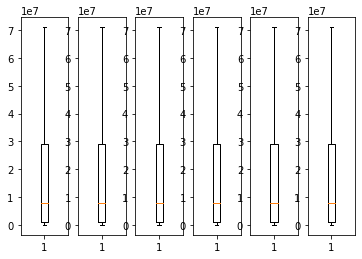

In [421]:
df4=data.iloc[:,[1,9]]
mydata1=df4.loc[df4['Year'] == 2015, ['Value']]
mydata1.columns=['2015']
df4=data.iloc[:,[1,9]]
mydata2=df4.loc[df4['Year'] == 2016, ['Value']]
mydata2.columns=['2016']
df4=data.iloc[:,[1,9]]
mydata3=df4.loc[df4['Year'] == 2017, ['Value']]
mydata3.columns=['2017']
df4=data.iloc[:,[1,9]]
mydata4=df4.loc[df4['Year'] == 2018, ['Value']]
mydata4.columns=['2018']
df4=data.iloc[:,[1,9]]
mydata5=df4.loc[df4['Year'] == 2019, ['Value']]
mydata5.columns=['2019']
df4=data.iloc[:,[1,9]]
mydata6=df4.loc[df4['Year'] == 2020, ['Value']]
mydata6.columns=['2020']
mydata1.index=range(len(mydata1))
mydata2.index=range(len(mydata2))
mydata3.index=range(len(mydata3))
mydata4.index=range(len(mydata4))
mydata5.index=range(len(mydata5))
mydata6.index=range(len(mydata6))
maxvalue=max([len(mydata1),len(mydata2),len(mydata3),len(mydata4),len(mydata5),len(mydata6)])
mydata=mydata1.join(mydata2).join(mydata3).join(mydata4).join(mydata5).join(mydata6)
#mydata.fillna(0)
#mydata=np.array(mydata)
#plt.boxplot(mydata,0,'')
fig,ax = plt.subplots(1,6)
ax[0].boxplot(mydata1,0,'')
ax[1].boxplot(mydata1,0,'')
ax[2].boxplot(mydata1,0,'')
ax[3].boxplot(mydata1,0,'')
ax[4].boxplot(mydata1,0,'')
ax[5].boxplot(mydata1,0,'')

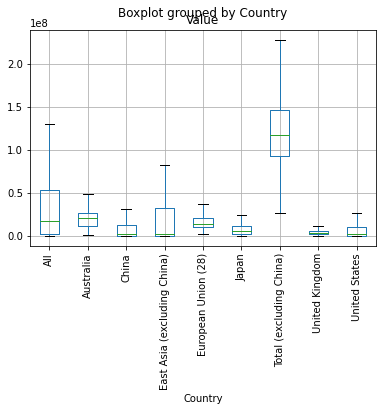

In [457]:
# encoding: utf-8
import pylab as pl

df5=data.iloc[:,[1,10]]
#data.boxplot(column='Cumulative', by='Year')
data.boxplot(column='Value', by='Country',showfliers=False)
pl.xticks(rotation=90)
plt.show()

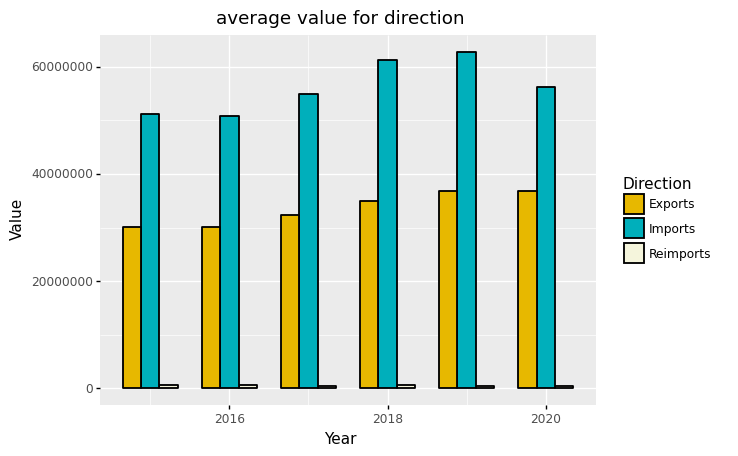

<ggplot: (8783034439178)>

In [441]:
(
    ggplot(df2_group, aes(x='Year', y='Value', fill='Direction'))
    + geom_bar(stat='identity', color='black', position='dodge', width=0.7, size=0.75) #dodge表示并排表示
    + scale_fill_manual(values=['#E7B800','#00AFBB','#F5F5DC'])
    +ggtitle('average value for direction')
)